# Request GSKY's WMS from Python (bushfire example)

In this notebook, 

- request images through GSKY WMS endpoints
- create a GIF using those images 

NCI's GSKY Data Server supports the Open Geospatial Consortium (OGC) Web Map Service (WMS), which is a standard protocol for serving geospatial data as images (e.g., PNG).   

In this example, we extract data from the "Multi-sensor (Landsat and Sentinel 2) surface reflectance false colour (Beta)" (DEA products) to view a bushfire in NSW, Australia over two days, 12-13 of September, 2019. 

#### You can view this example via [Terria Map](http://terria-cube.terria.io/#share=s-lbRTW2mmLscIY4mMtA2tHk1SSoB).

#### The following libraries will need to be imported for this example:

In [1]:
from owslib.wms import WebMapService
from PIL import Image, ImageDraw, ImageFilter
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

**To start, we will need the base GSKY server URL:**

In [2]:
gsky_url = 'https://gsky.nci.org.au/ows/dea'

**Using OWSLib, we can begin by inspecting the service metadata to find out the available data layers:**

In [3]:
wms = WebMapService(gsky_url, version='1.3.0')
for layer in list(wms.contents):
    print("Layer Name:", wms[layer].name)
    print("Title:", wms[layer].title, '\n')

Layer Name: blend_sentinel2_landsat_nbart_daily
Title: Multi-sensor (Landsat and Sentinel 2) surface reflectance (Beta) 

Layer Name: hltc_high
Title: DEA High Tide Composite 25m v2.0 

Layer Name: hltc_low
Title: DEA Low Tide Composite 25m v2.0 

Layer Name: item_relative
Title: DEA Intertidal Extents Model Relative Layer 25m v2.0 

Layer Name: item_stddev
Title: DEA Intertidal Extents Model Confidence Layer 25m v2.0 

Layer Name: landsat5_geomedian
Title: DEA Landsat 5 terrain corrected surface reflectance geometric median 

Layer Name: landsat5_nbar_16day
Title: 16-day DEA Landsat 5 surface reflectance 

Layer Name: landsat5_nbar_daily
Title: Daily DEA Landsat 5 surface reflectance 

Layer Name: landsat5_nbart_16day
Title: 16-day DEA Landsat 5 terrain corrected surface reflectance 

Layer Name: landsat5_nbart_daily
Title: Daily DEA Landsat 5 terrain corrected surface reflectance 

Layer Name: landsat7_geomedian
Title: DEA Landsat 7 terrain corrected surface reflectance geometric med

**We can also view metadata that is available about a selected layer. For example, you can view the abstract associated with that data layer.** 

In [4]:
layer = "blend_sentinel2_landsat_nbart_daily"

**Or view the CRS options, bounding box, and time positions available (these details will be needed to construct the GetMap request):** 

In [5]:
print("CRS Options: ")
crs = sorted(wms[layer].crsOptions)
print('\t', crs, '\n')
    
print("Bounding Box: ")
bbox = wms[layer].boundingBox
print('\t', bbox, '\n')
    
print("Time Positions: ")
time = wms[layer].timepositions
print('\t', time[12300:12320], '\n')

CRS Options: 
	 ['EPSG:3857', 'EPSG:4326'] 

Bounding Box: 
	 (-180.0, -90.0, 180.0, 90.0, 'EPSG:4326') 

Time Positions: 
	 ['2019-09-05T00:00:00.000Z', '2019-09-06T00:00:00.000Z', '2019-09-07T00:00:00.000Z', '2019-09-08T00:00:00.000Z', '2019-09-09T00:00:00.000Z', '2019-09-10T00:00:00.000Z', '2019-09-11T00:00:00.000Z', '2019-09-12T00:00:00.000Z', '2019-09-13T00:00:00.000Z', '2019-09-14T00:00:00.000Z', '2019-09-15T00:00:00.000Z', '2019-09-16T00:00:00.000Z', '2019-09-17T00:00:00.000Z', '2019-09-18T00:00:00.000Z', '2019-09-19T00:00:00.000Z', '2019-09-20T00:00:00.000Z', '2019-09-21T00:00:00.000Z', '2019-09-22T00:00:00.000Z', '2019-09-23T00:00:00.000Z', '2019-09-24T00:00:00.000Z'] 



**Now, we can construct the bounding box and time selection for our bushfire example in NSW Australia, over two days, 12-13 of September, 2019.**

**We'll need to define a bounding box for our request:**

In [6]:
subset_bbox = (152, -30, 152.45, -30.2)
#subset_bbox = (152, -31.2, 152.3, -30.5) You can modify this bounding box to look at different area. 

**OWSLib's library can now be used to make the GetMap request and print out the images:**

2019-09-11T00:00:00.000Z
2019-09-12T00:00:00.000Z
2019-09-13T00:00:00.000Z


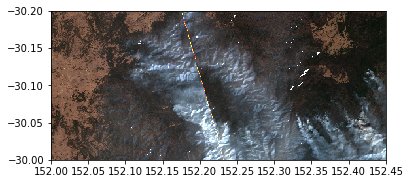

In [7]:
# 2019-09-12 - 09-13 
dates = ['2019-09-11T00:00:00.000Z','2019-09-12T00:00:00.000Z','2019-09-13T00:00:00.000Z']

images = []

for date in dates:
    print(date)
    img = wms.getmap(layers=[layer],
                    srs='EPSG:4326',
                    bbox=(subset_bbox[0], subset_bbox[1], subset_bbox[2], subset_bbox[3]),
                    size=(512, 256), 
                    format='image/png',
                    time=date
                    )
    im = Image.open(img)
    images.append(im)
    im.save('gsky_getMap%.10s.png' % date)
    
    im = Image.open(img)
    fig = plt.figure
    imgplot = plt.imshow(im,extent=[subset_bbox[0], subset_bbox[2], subset_bbox[1], subset_bbox[3]])
    
    
images[0].save('bushfire_NSW.gif',save_all=True, append_images=images[1:],optimize=False,duration=2,loop=0)

Another way to make GIF is using https://giphy.com/create/gifmaker, where you can upload all .png files, and create a fancier GIF. For example, you can add annotation.

<br>
<br>
<br>


--------
**For more information on the OGC WMS standard specifications and the Python OWSLib package:** <br/>

* http://www.opengeospatial.org/standards/wms <br/>

* https://geopython.github.io/OWSLib/#wms <br/>
